In [6]:
# -*- coding: utf-8 -*

# import xlrd
import pymysql
import pandas as pd
import plotly.plotly as py
from plotly.graph_objs import *
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

matplotlib.style.use('ggplot')
%matplotlib inline

In [7]:
# 连接数据库，读取数据

print("连接数据库")
db = pymysql.connect(host="39.105.165.114", user="root", password="zym2112!", use_unicode=True, charset="utf8")
print("数据库连接成功")
cursor = db.cursor()
cursor.execute("USE product_info_db;")
cursor.execute("select * from product_info; ")
rows = cursor.fetchall()
df = pd.DataFrame([[ij for ij in i] for i in rows])
print("数据读取完成！")

连接数据库
数据库连接成功
数据读取完成！


In [8]:
db.close()
cursor.close()

In [9]:
# 1. 删除重复

In [10]:
linenum = df.shape[0]
print("数据行数： " + str(linenum))
df_noDup = df.drop_duplicates([0])
linenum_noDup = df_noDup.shape[0]
print("去掉barcode中的重复项")
print("去掉了" + str(linenum - linenum_noDup) + "行，此时数据有" + str(linenum_noDup) + "行")
df_noDup.rename(columns={0:'barcode',1:'sellType',2:'wholesalePrice',3:'productName',4:'referencePurchasePrice',5:'retailPrice',6:'unit',7:'specification',8:'lowestRetailPrice',9:'productNature',10:'warrantyPeriod',11:'distributionMethod',12:'estimatedDaysOfUse',13:'grossProfitMargin'},
          inplace=True);
df_noDup.head()

数据行数： 8218
去掉barcode中的重复项
去掉了14行，此时数据有8204行


c:\users\ww\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,barcode,sellType,wholesalePrice,productName,referencePurchasePrice,retailPrice,unit,specification,lowestRetailPrice,productNature,warrantyPeriod,distributionMethod,estimatedDaysOfUse,grossProfitMargin
0,6937841780522,只销,20.0,None,20.00,35.0,瓶,500ML,NaN,0、普通商品,3650.0,购销,NaN,0.429
1,6927061500215,只销,20.0,None,1.30,2.0,个,46G,NaN,0、普通商品,180.0,购销,NaN,0.350
2,8412253001086,只销,20.0,#贝蒂斯特初级榨橄榄油500ml,72.98,92.0,瓶,500ml,NaN,0、普通商品,NaN,购销,NaN,0.207
3,8412253900105,只销,20.0,#贝蒂斯特级初榨橄榄油（礼盒）750ml*2,212.38,269.0,盒,750ml,NaN,0、普通商品,NaN,购销,NaN,0.210
4,6914973303058,只销,20.0,#德芙精选07金色装160g,67.00,78.0,盒,160g,0.0,0、普通商品,360.0,购销,0.0,0.141


In [11]:
print("referencePurchasePrice与grossProfitMargin相关系数：" + str(df_noDup['referencePurchasePrice'].corr(df_noDup['grossProfitMargin'])))
print("retailPrice与grossProfitMargin相关系数：" + str(df_noDup['retailPrice'].corr(df_noDup['grossProfitMargin'])))

referencePurchasePrice与grossProfitMargin相关系数：-0.10056620520605113
retailPrice与grossProfitMargin相关系数：0.06895812581705467


In [12]:
# 2. 检测并处理异常值

In [13]:
df_noDup.describe()

,wholesalePrice,referencePurchasePrice,retailPrice,lowestRetailPrice,warrantyPeriod,estimatedDaysOfUse,grossProfitMargin
count,8204.0,8204.000000,8204.000000,3889.0,3668.00000,3889.0,8204.000000
mean,20.0,14.980729,79.854896,0.0,534.75627,0.0,0.268086
std,0.0,139.552207,5524.461942,0.0,870.89722,0.0,0.113759
min,20.0,0.000000,0.000000,0.0,2.00000,0.0,0.000000
25%,20.0,2.200000,3.000000,0.0,300.00000,0.0,0.203000
50%,20.0,4.000000,5.800000,0.0,360.00000,0.0,0.250000
75%,20.0,9.000000,12.500000,0.0,365.00000,0.0,0.308000
max,20.0,8000.000000,500239.000000,0.0,10000.00000,0.0,1.000000


In [14]:
# 从表中可以发现：
# wholesalePrice列数值均为同样的值20，存在问题；
# referencePurchasePrice和retailPrice列有过大的数值，怀疑存在异常数据；
# estimatedDaysOfUse值均为0，不符合常理，存在问题。
# 下面对怀疑数据进行进一步分析。

In [15]:
# referencePurchasePrice
df_noDup[df_noDup['referencePurchasePrice']>1000]


,barcode,sellType,wholesalePrice,productName,referencePurchasePrice,retailPrice,unit,specification,lowestRetailPrice,productNature,warrantyPeriod,distributionMethod,estimatedDaysOfUse,grossProfitMargin
7986,8180500100515,只销,20.0,资产冰柜（伊利SD-182）专,2000.0,2000.0,台,None,0.0,0、普通商品,NaN,购销,0.0,0.0
7997,8180500100218,只销,20.0,资产电脑主机,2000.0,2000.0,台,None,0.0,0、普通商品,NaN,购销,0.0,0.0
7999,8180500100379,只销,20.0,资产发布机,5000.0,5000.0,台,None,0.0,0、普通商品,NaN,购销,0.0,0.0
8006,8180500100409,只销,20.0,资产咖啡饮料机,2000.0,2000.0,台,None,0.0,0、普通商品,NaN,购销,0.0,0.0
8010,8180500100089,只销,20.0,资产空调壁挂,2800.0,2800.0,台,None,0.0,0、普通商品,NaN,购销,0.0,0.0
8011,8180500100119,只销,20.0,资产空调吸顶,8000.0,8000.0,个,None,0.0,0、普通商品,NaN,购销,0.0,0.0
8055,8180500100386,只销,20.0,资产液晶电视（广告）,2000.0,2000.0,台,None,0.0,0、普通商品,NaN,购销,0.0,0.0
8061,8180500100157,只销,20.0,资产中澳冷柜(陈列饮料,6000.0,6000.0,台,None,0.0,0、普通商品,NaN,购销,0.0,0.0


In [16]:
# 可以发现价格较高的商品均为较为昂贵的家电，没有出现过于异常的数据。

In [17]:
# retailPrice
df_noDup[df_noDup['retailPrice']>1000]


,barcode,sellType,wholesalePrice,productName,referencePurchasePrice,retailPrice,unit,specification,lowestRetailPrice,productNature,warrantyPeriod,distributionMethod,estimatedDaysOfUse,grossProfitMargin
1406,6936501587259,只销,20.0,百灵双喜缎方格毛巾,5.0,500239.0,条,None,NaN,0、普通商品,NaN,购销,NaN,1.0
7986,8180500100515,只销,20.0,资产冰柜（伊利SD-182）专,2000.0,2000.0,台,None,0.0,0、普通商品,NaN,购销,0.0,0.0
7997,8180500100218,只销,20.0,资产电脑主机,2000.0,2000.0,台,None,0.0,0、普通商品,NaN,购销,0.0,0.0
7999,8180500100379,只销,20.0,资产发布机,5000.0,5000.0,台,None,0.0,0、普通商品,NaN,购销,0.0,0.0
8006,8180500100409,只销,20.0,资产咖啡饮料机,2000.0,2000.0,台,None,0.0,0、普通商品,NaN,购销,0.0,0.0
8010,8180500100089,只销,20.0,资产空调壁挂,2800.0,2800.0,台,None,0.0,0、普通商品,NaN,购销,0.0,0.0
8011,8180500100119,只销,20.0,资产空调吸顶,8000.0,8000.0,个,None,0.0,0、普通商品,NaN,购销,0.0,0.0
8055,8180500100386,只销,20.0,资产液晶电视（广告）,2000.0,2000.0,台,None,0.0,0、普通商品,NaN,购销,0.0,0.0
8061,8180500100157,只销,20.0,资产中澳冷柜(陈列饮料,6000.0,6000.0,台,None,0.0,0、普通商品,NaN,购销,0.0,0.0


In [18]:
# 可以发现“百灵双喜缎方格毛巾”的retailPrice=500239.0是不符合实际的，为错误数据，在此将其删去
df_noDup = df_noDup[df_noDup['retailPrice'] < 500000]

In [19]:
df_noDup[df_noDup['warrantyPeriod']>8000]

,barcode,sellType,wholesalePrice,productName,referencePurchasePrice,retailPrice,unit,specification,lowestRetailPrice,productNature,warrantyPeriod,distributionMethod,estimatedDaysOfUse,grossProfitMargin
429,6948119100065,只销,20.0,*猫王16LED应急灯充电手电筒,15.53,25.9,个,None,NaN,0、普通商品,10000.0,购销,NaN,0.400
430,6948119100041,只销,20.0,*猫王8LED应急灯充电手电筒,12.83,21.4,个,None,NaN,0、普通商品,10000.0,购销,NaN,0.401
431,6948119100096,只销,20.0,*猫王多功能好易拍K003,15.00,19.9,个,None,NaN,0、普通商品,10000.0,购销,NaN,0.246
432,6948119100607,只销,20.0,*猫王儿童安全插座B001b,36.99,61.7,个,None,NaN,0、普通商品,10000.0,购销,NaN,0.400
433,6948119100621,只销,20.0,*猫王儿童安全插座B002b,42.53,70.9,个,None,NaN,0、普通商品,10000.0,购销,NaN,0.400
434,6948119100713,只销,20.0,*猫王儿童安全插座B007a,34.43,57.4,个,None,NaN,0、普通商品,10000.0,购销,NaN,0.400
480,6908509901023,只销,20.0,*莫高蓝带冰酒500ml,168.00,258.0,瓶,500ml*6,NaN,0、普通商品,10000.0,购销,NaN,0.349
481,6908509030075,只销,20.0,*莫高水晶国宴冰酒500ml,128.00,198.0,瓶,500ml*6,NaN,0、普通商品,10000.0,购销,NaN,0.354
482,6908509900866,只销,20.0,*莫高小冰白冰酒375ml,188.00,288.0,瓶,375ml*6,NaN,0、普通商品,10000.0,购销,NaN,0.347
483,6908509900880,只销,20.0,*莫高小冰红冰酒375ml,188.00,288.0,瓶,375ml*6,NaN,0、普通商品,10000.0,购销,NaN,0.347


In [20]:
# 3. 数据分析

In [21]:
# 关于表格数据的一些统计量
df_noDup.describe()

,wholesalePrice,referencePurchasePrice,retailPrice,lowestRetailPrice,warrantyPeriod,estimatedDaysOfUse,grossProfitMargin
count,8203.0,8203.000000,8203.000000,3889.0,3668.00000,3889.0,8203.000000
mean,20.0,14.981946,18.882186,0.0,534.75627,0.0,0.267997
std,0.0,139.560670,141.087535,0.0,870.89722,0.0,0.113479
min,20.0,0.000000,0.000000,0.0,2.00000,0.0,0.000000
25%,20.0,2.200000,3.000000,0.0,300.00000,0.0,0.203000
50%,20.0,4.000000,5.800000,0.0,360.00000,0.0,0.250000
75%,20.0,9.000000,12.500000,0.0,365.00000,0.0,0.308000
max,20.0,8000.000000,8000.000000,0.0,10000.00000,0.0,0.999000


In [22]:
print("连接数据库")
db = pymysql.connect(host="39.105.165.114", user="root", password="zym2112!", use_unicode=True, charset="utf8")
print("数据库连接成功")
cursor = db.cursor()
cursor.execute("USE product_info_db;")

连接数据库
数据库连接成功


0

In [23]:
cursor.execute("select count(distinct(unit)) from product_info; ")
result = cursor.fetchall()
df_2 = pd.DataFrame([[ij for ij in i] for i in result])
print("数据表格中共有 " + str(df_2[0][0]) + " 种商品单位，它们为：")
cursor.execute("select distinct(unit) from product_info; ")
result = cursor.fetchall()
df_3 = pd.DataFrame([[ij for ij in i] for i in result])
for e in df_3[0]:
    print(e,  end=', ')

数据表格中共有 64 种商品单位，它们为：
瓶, 个, 盒, 提, 包, 罐, 条, 支, 双, 件, 袋, 把, 张, 本, 块, 卷, 根, 杯, 听, 粒, 面, 桶, 组, 19, 板, 排, 筒, 500g, None, 串, 台, 捆, 枚, 套, kg, 碗, 大包, 辆, 只, 被, 片, 卡, 箱, 份, 次, 嗲, 架, 博爱, JIAN, 盏, 打, 付, 扎, 碟, 对, 带, 米, 平, 盒、, bao, 部, 元, 度, 各, 200g, 

In [24]:
cursor.execute("select distinct(barcode), productName, retailPrice, grossProfitMargin from product_info where retailPrice>12.5 and retailPrice<500000 and grossProfitMargin>0.308 order by grossProfitMargin DESC; ")
result = cursor.fetchall()
df_3 = pd.DataFrame([[ij for ij in i] for i in result])
print("根据retailPrice和grossProfitMargin大于75%的标准，这里筛选了 " + str(len(df_3[0])) + " 种商品，建议超市在下一阶段增大这些商品的促销力度，它们为：")
df_3

根据retailPrice和grossProfitMargin大于75%的标准，这里筛选了 522 种商品，建议超市在下一阶段增大这些商品的促销力度，它们为：


,0,1,2,3
0,6925303723644,统一桂花清茶500ML,25.0,0.919
1,6925303723651,统一茉莉清茶500ML,25.0,0.919
2,8150303800004,康力牌含氯消毒液,14.0,0.898
3,6938586493029,与狼共舞（DWP65517-5）,159.0,0.750
4,3344398004408,塔乐丝干红葡萄酒750ml,108.0,0.741
5,8437002040314,富仕阁精装型CHARDONNAY霞多丽干白750ml,228.0,0.737
6,8437002040338,富仕阁精装型CABERNETSAUVIGNON赤霞珠干红750ml,228.0,0.737
7,3077051201493,郁金香古堡干红葡萄酒750ml,158.0,0.734
8,3191740401299,维尼亚AOC干白750ml,158.0,0.734
9,8437002040321,富仕阁精装型TEMPRANILLO丹普兰尼洛干红750ml,185.0,0.730


In [25]:
db.close()
cursor.close()

In [26]:
# 各列数据分布情况

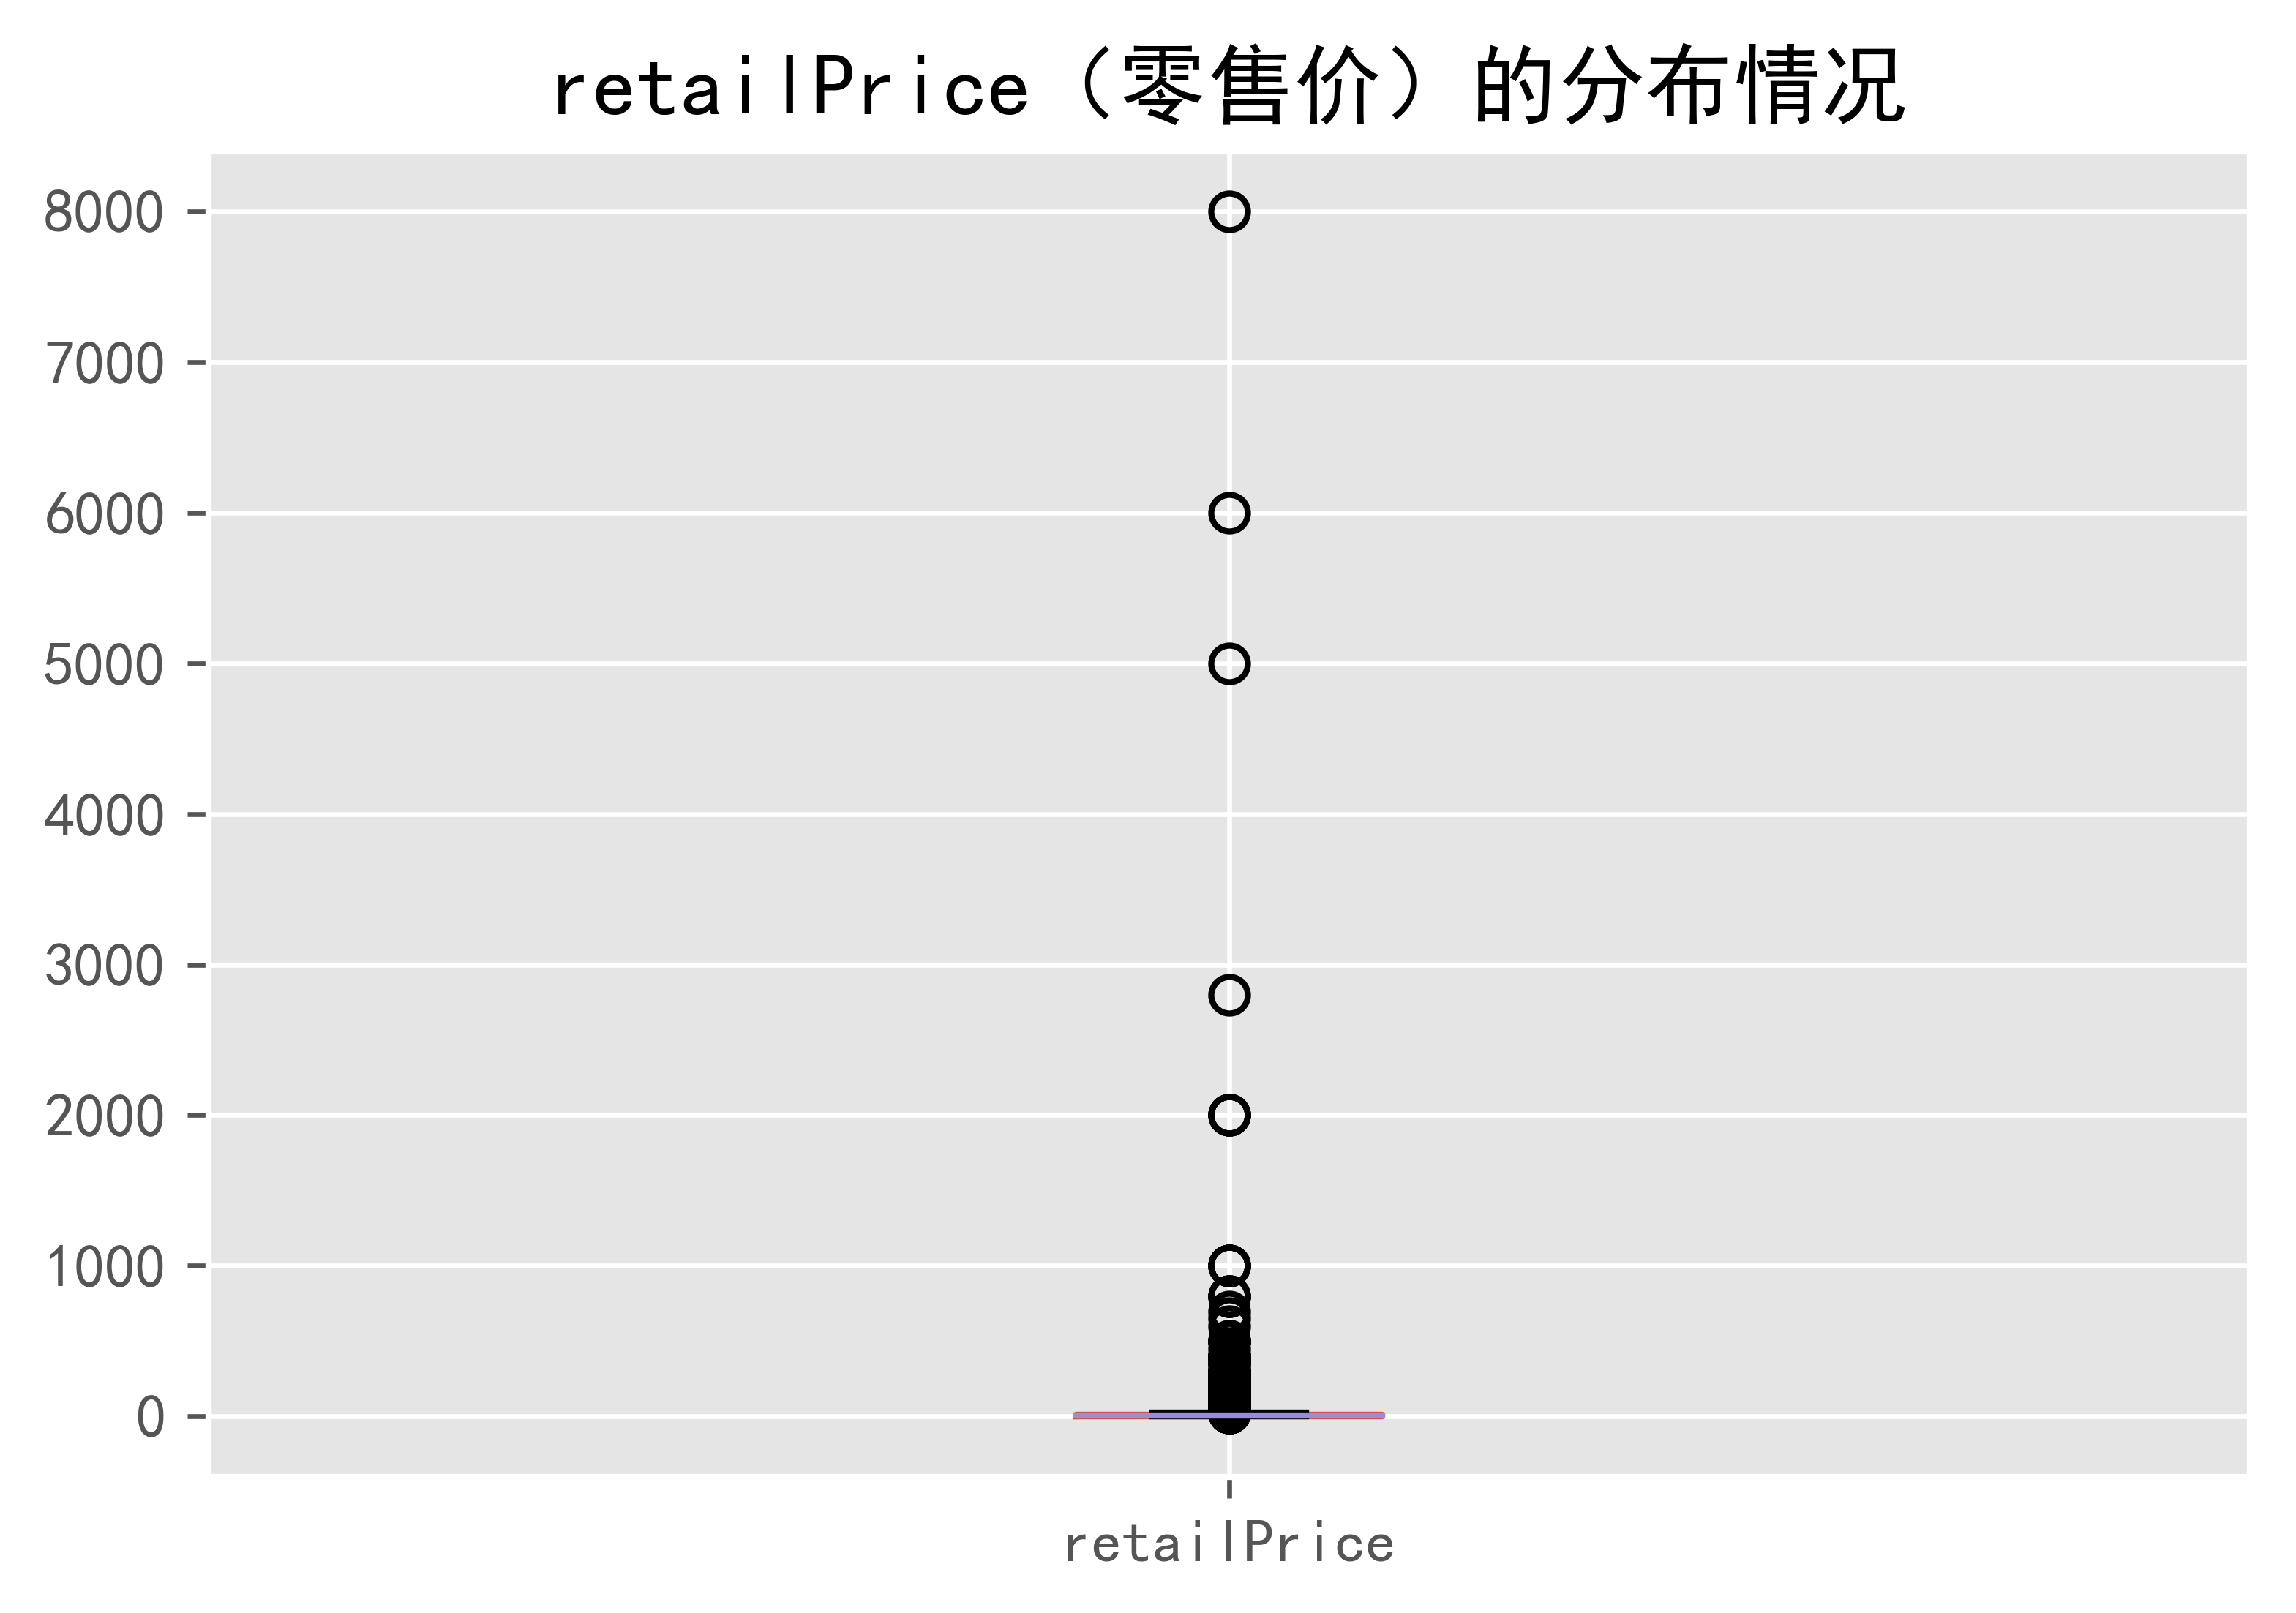

In [27]:
plt.figure()
plt.rcParams['figure.figsize'] = (8, 4) # 设置figure_size尺寸
plt.rcParams['savefig.dpi'] = 600 #图片像素
plt.rcParams['figure.dpi'] = 600
plt.title("retailPrice（零售价）的分布情况")
df_noDup['retailPrice'].plot.box()
plt.show()

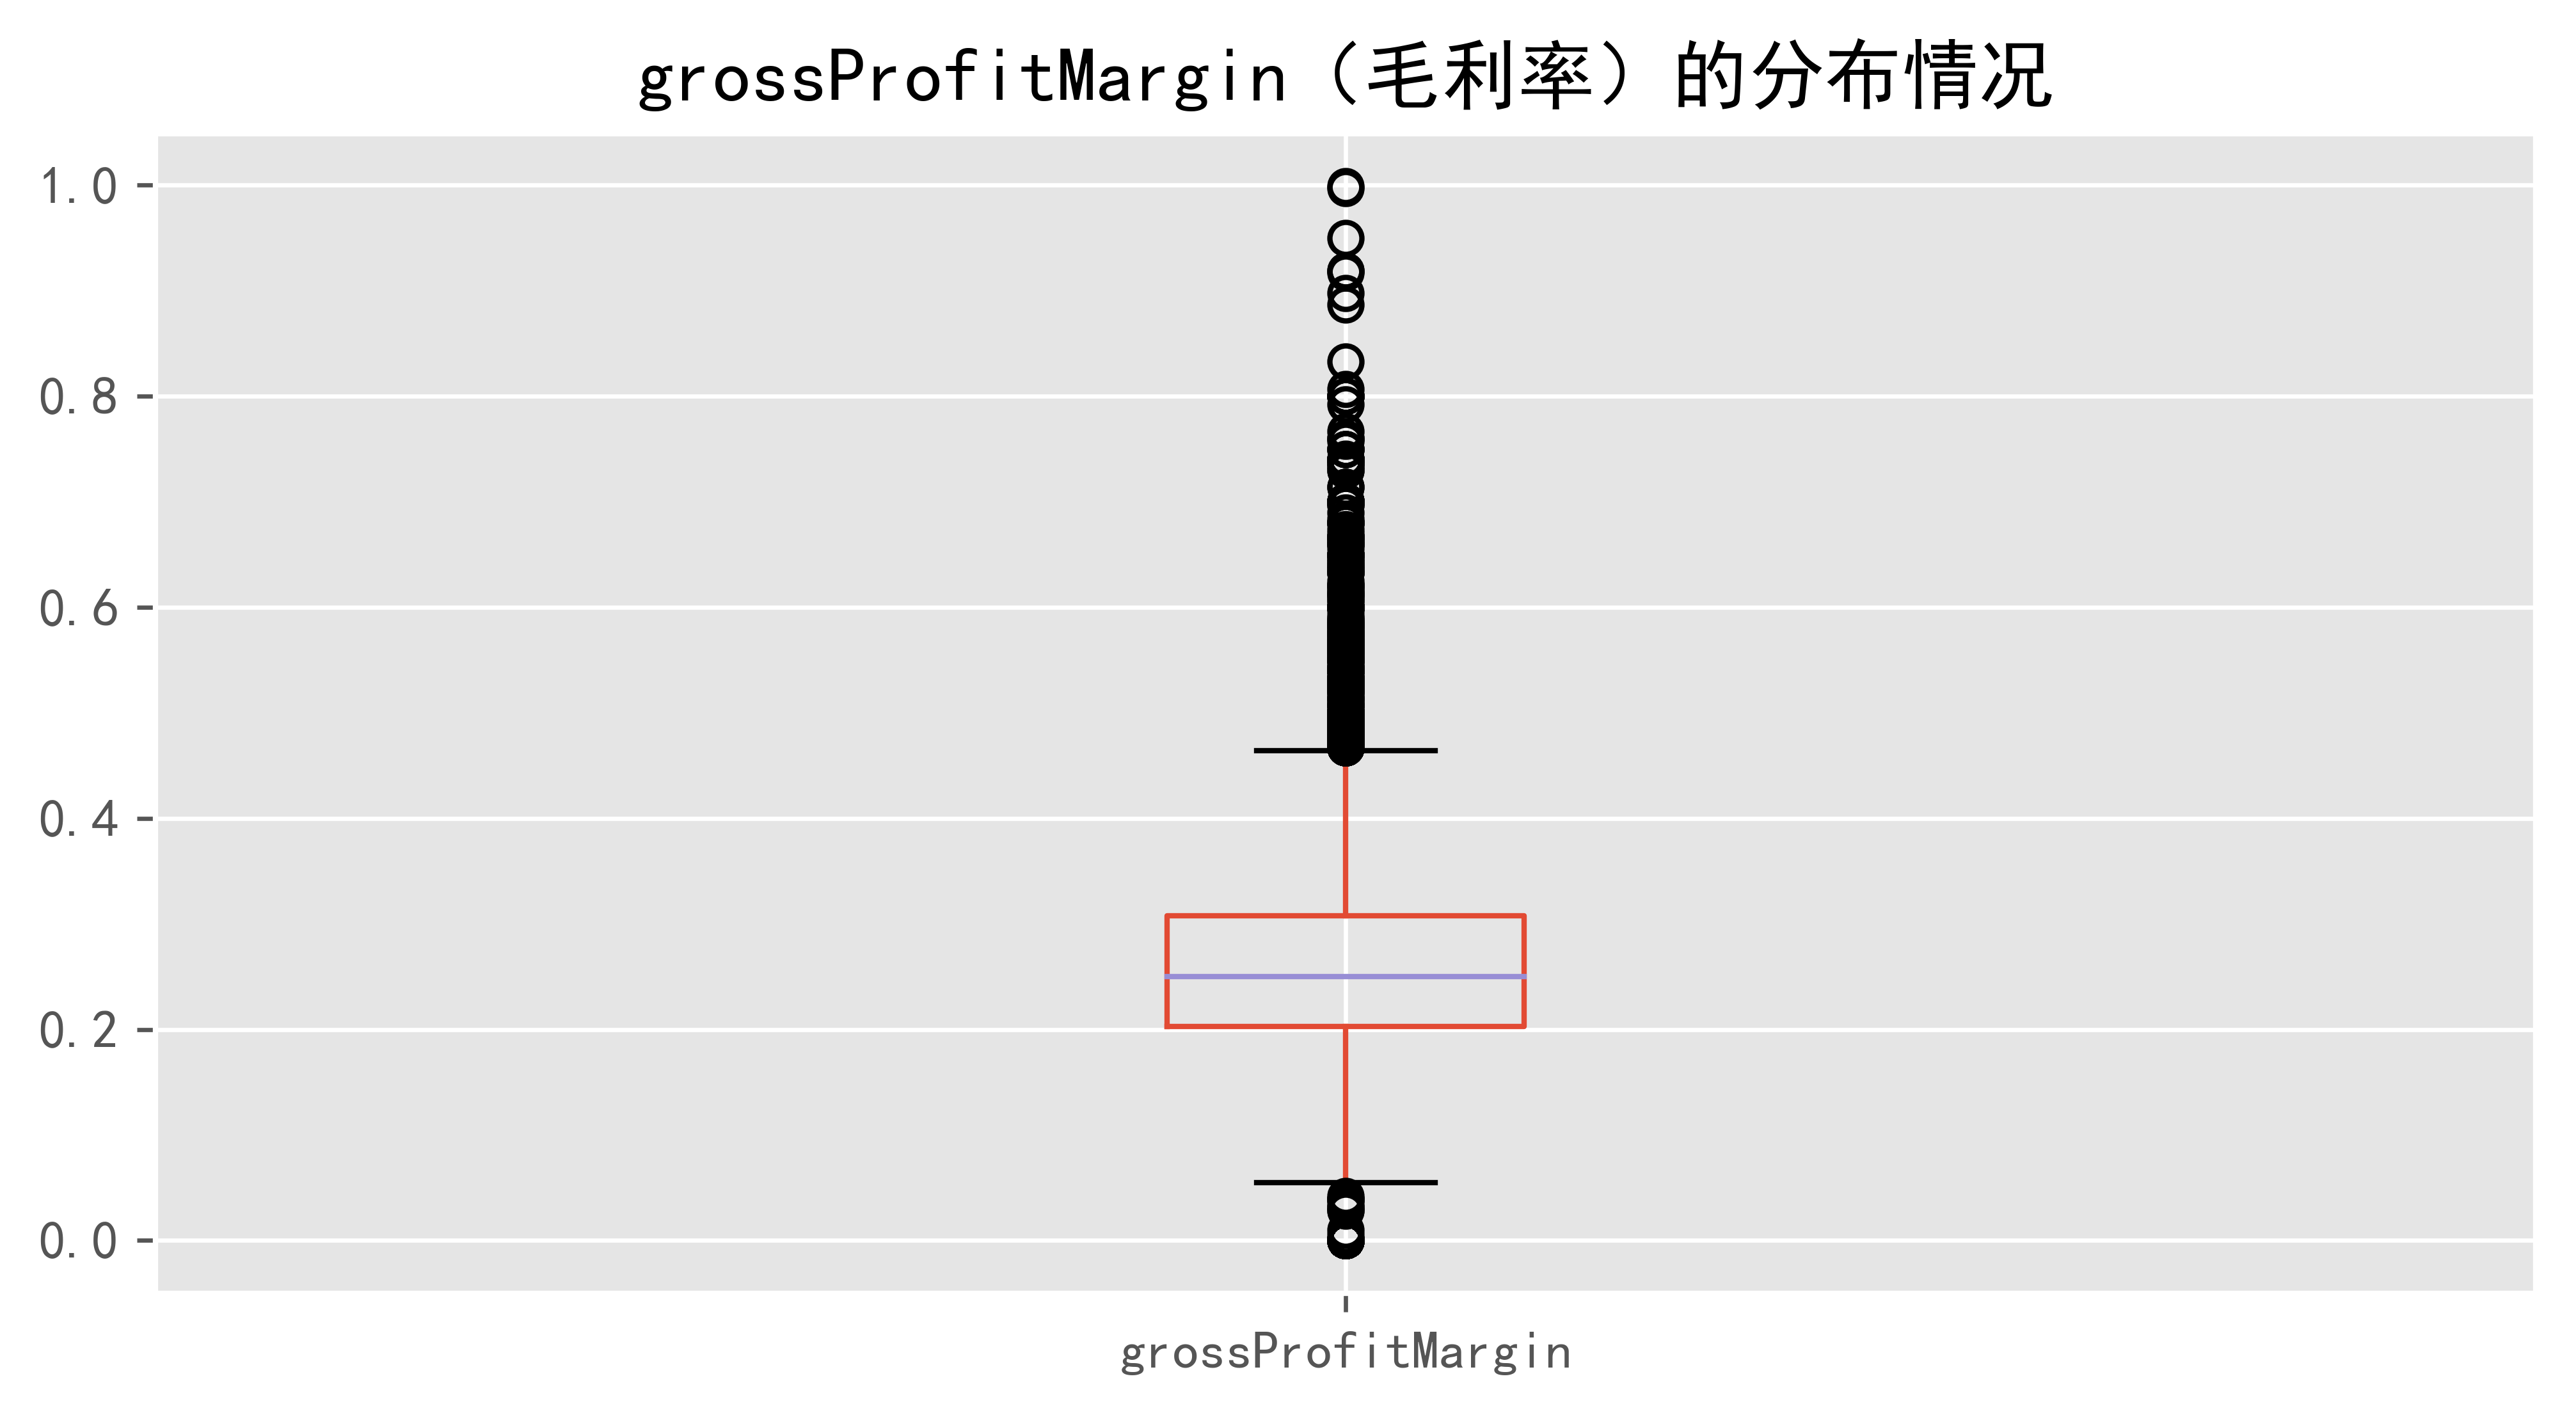

In [28]:
plt.figure()
plt.title("grossProfitMargin（毛利率）的分布情况")
df_noDup['grossProfitMargin'].plot.box()
plt.show()

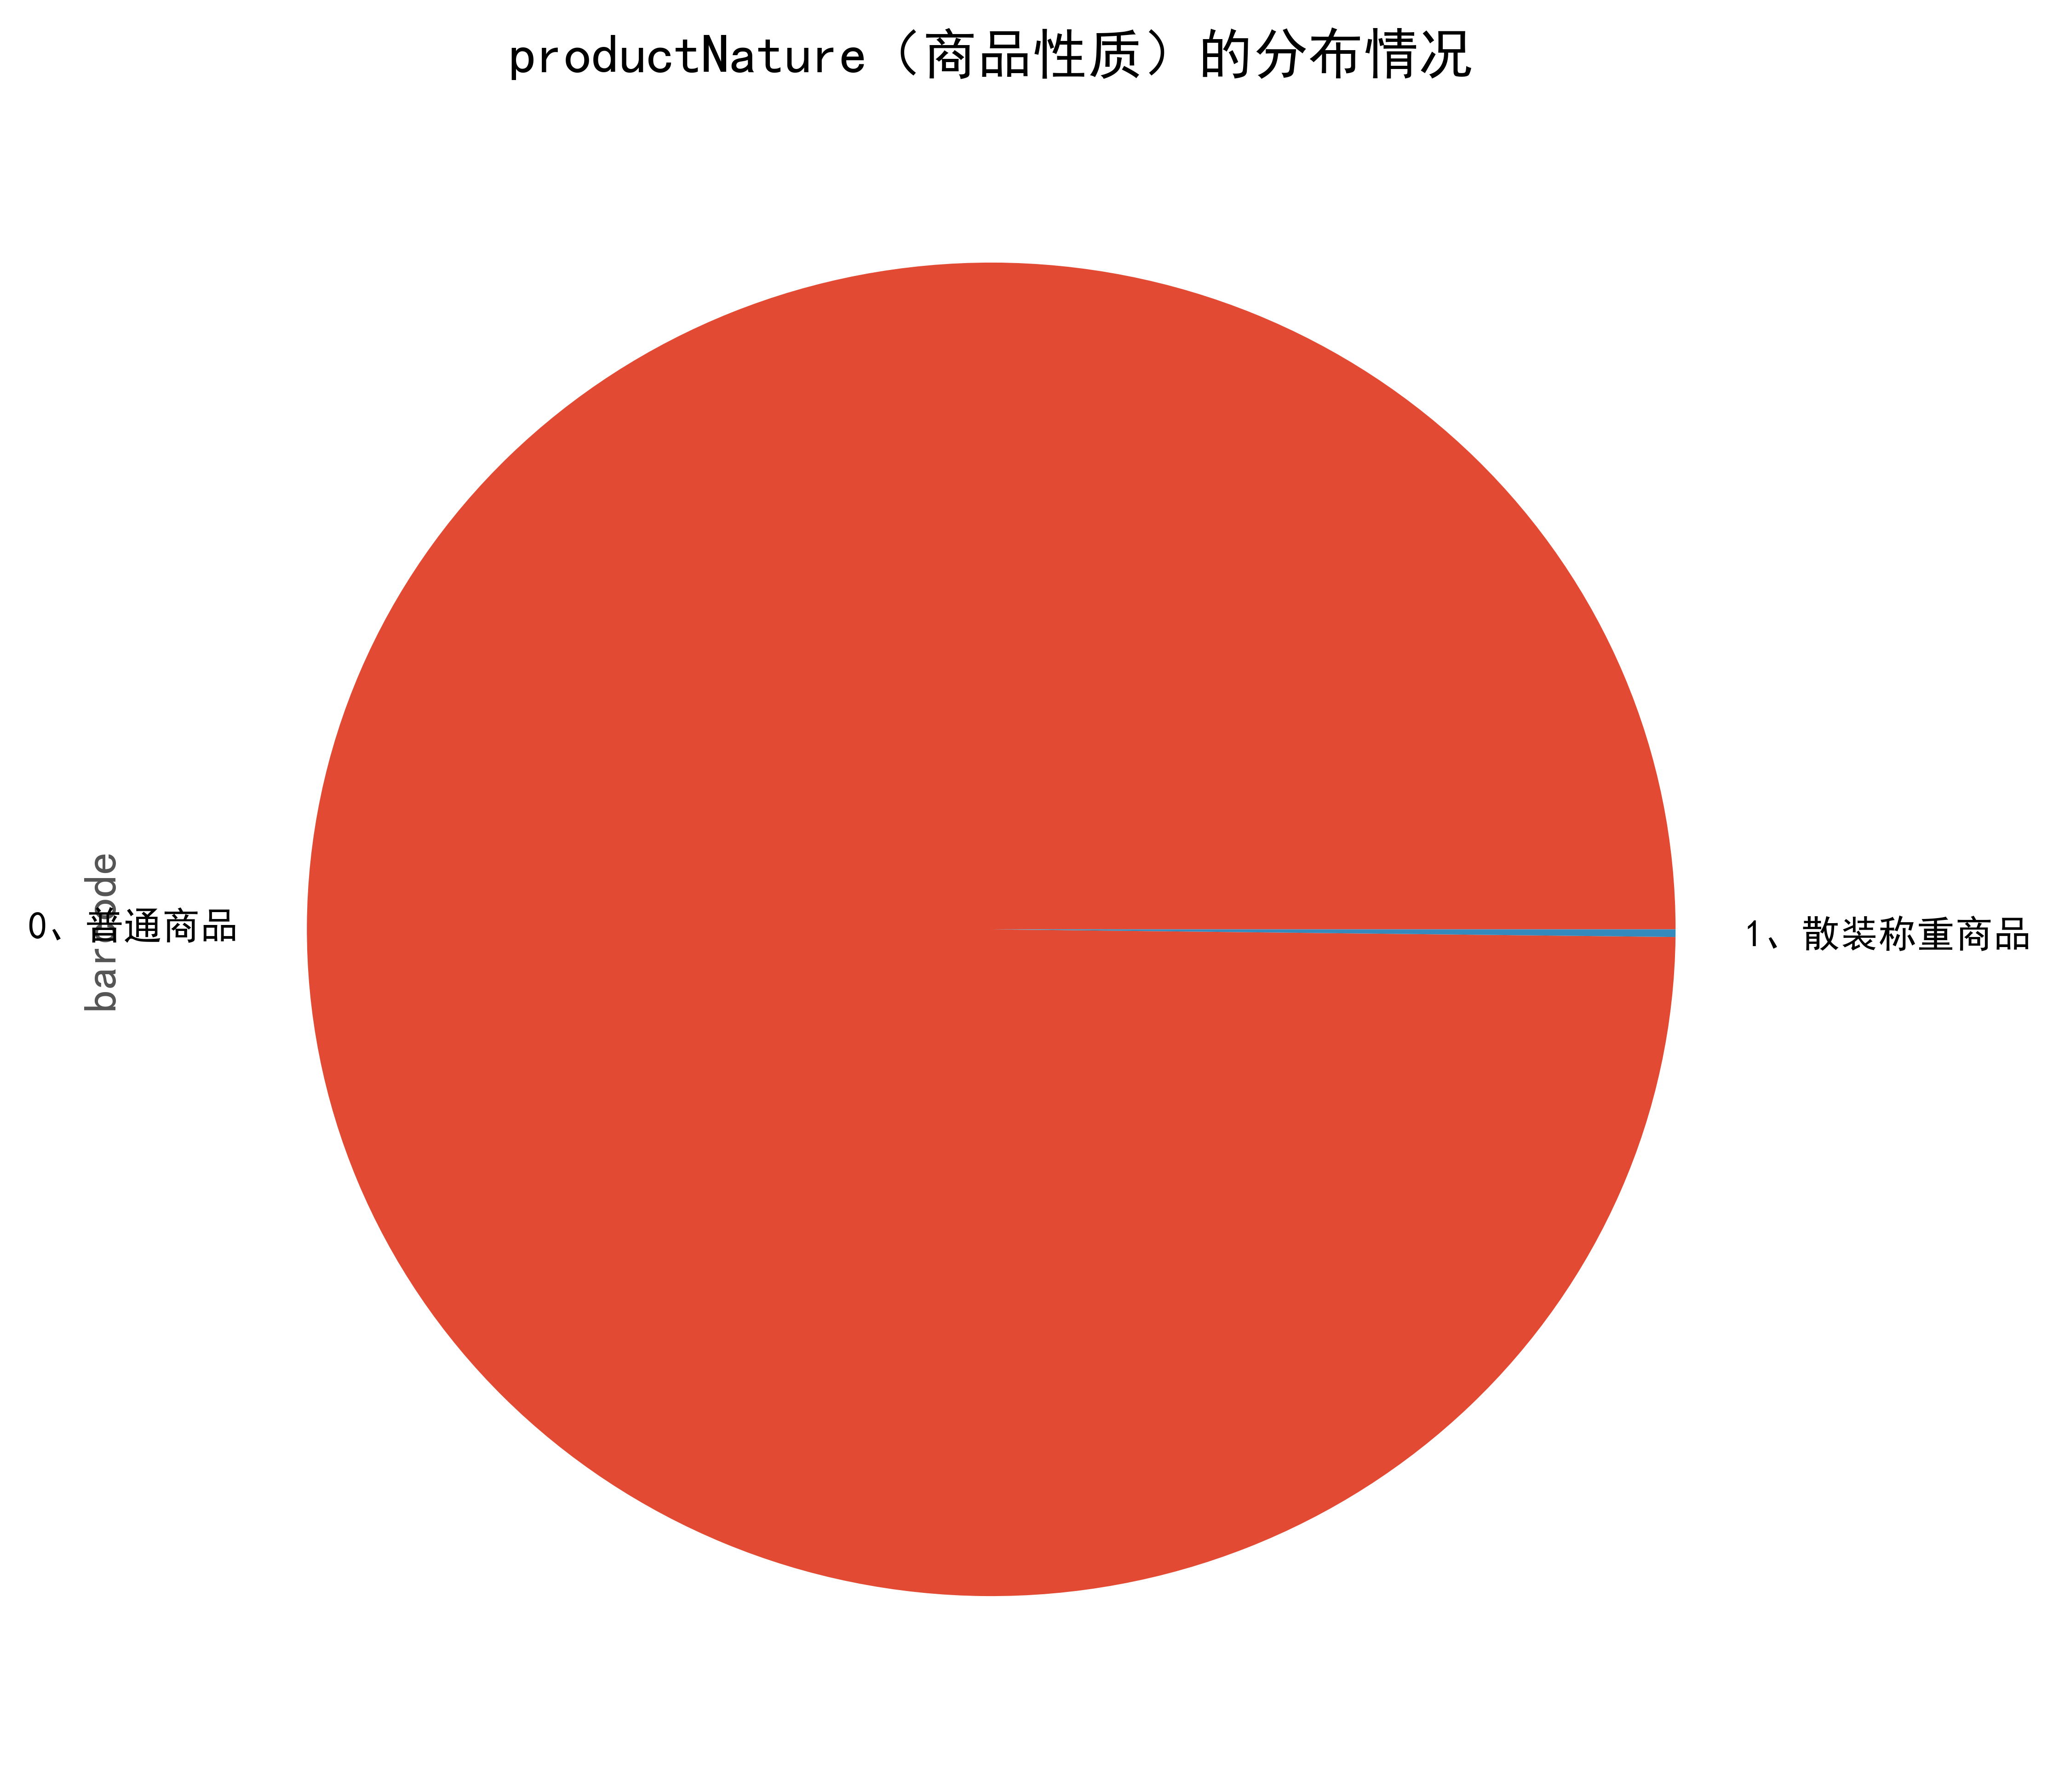

In [29]:
plt.figure()
plt.title("productNature（商品性质）的分布情况")
df_noDup.groupby('productNature')['barcode'].count().plot.pie(figsize=(8,8))
plt.show()

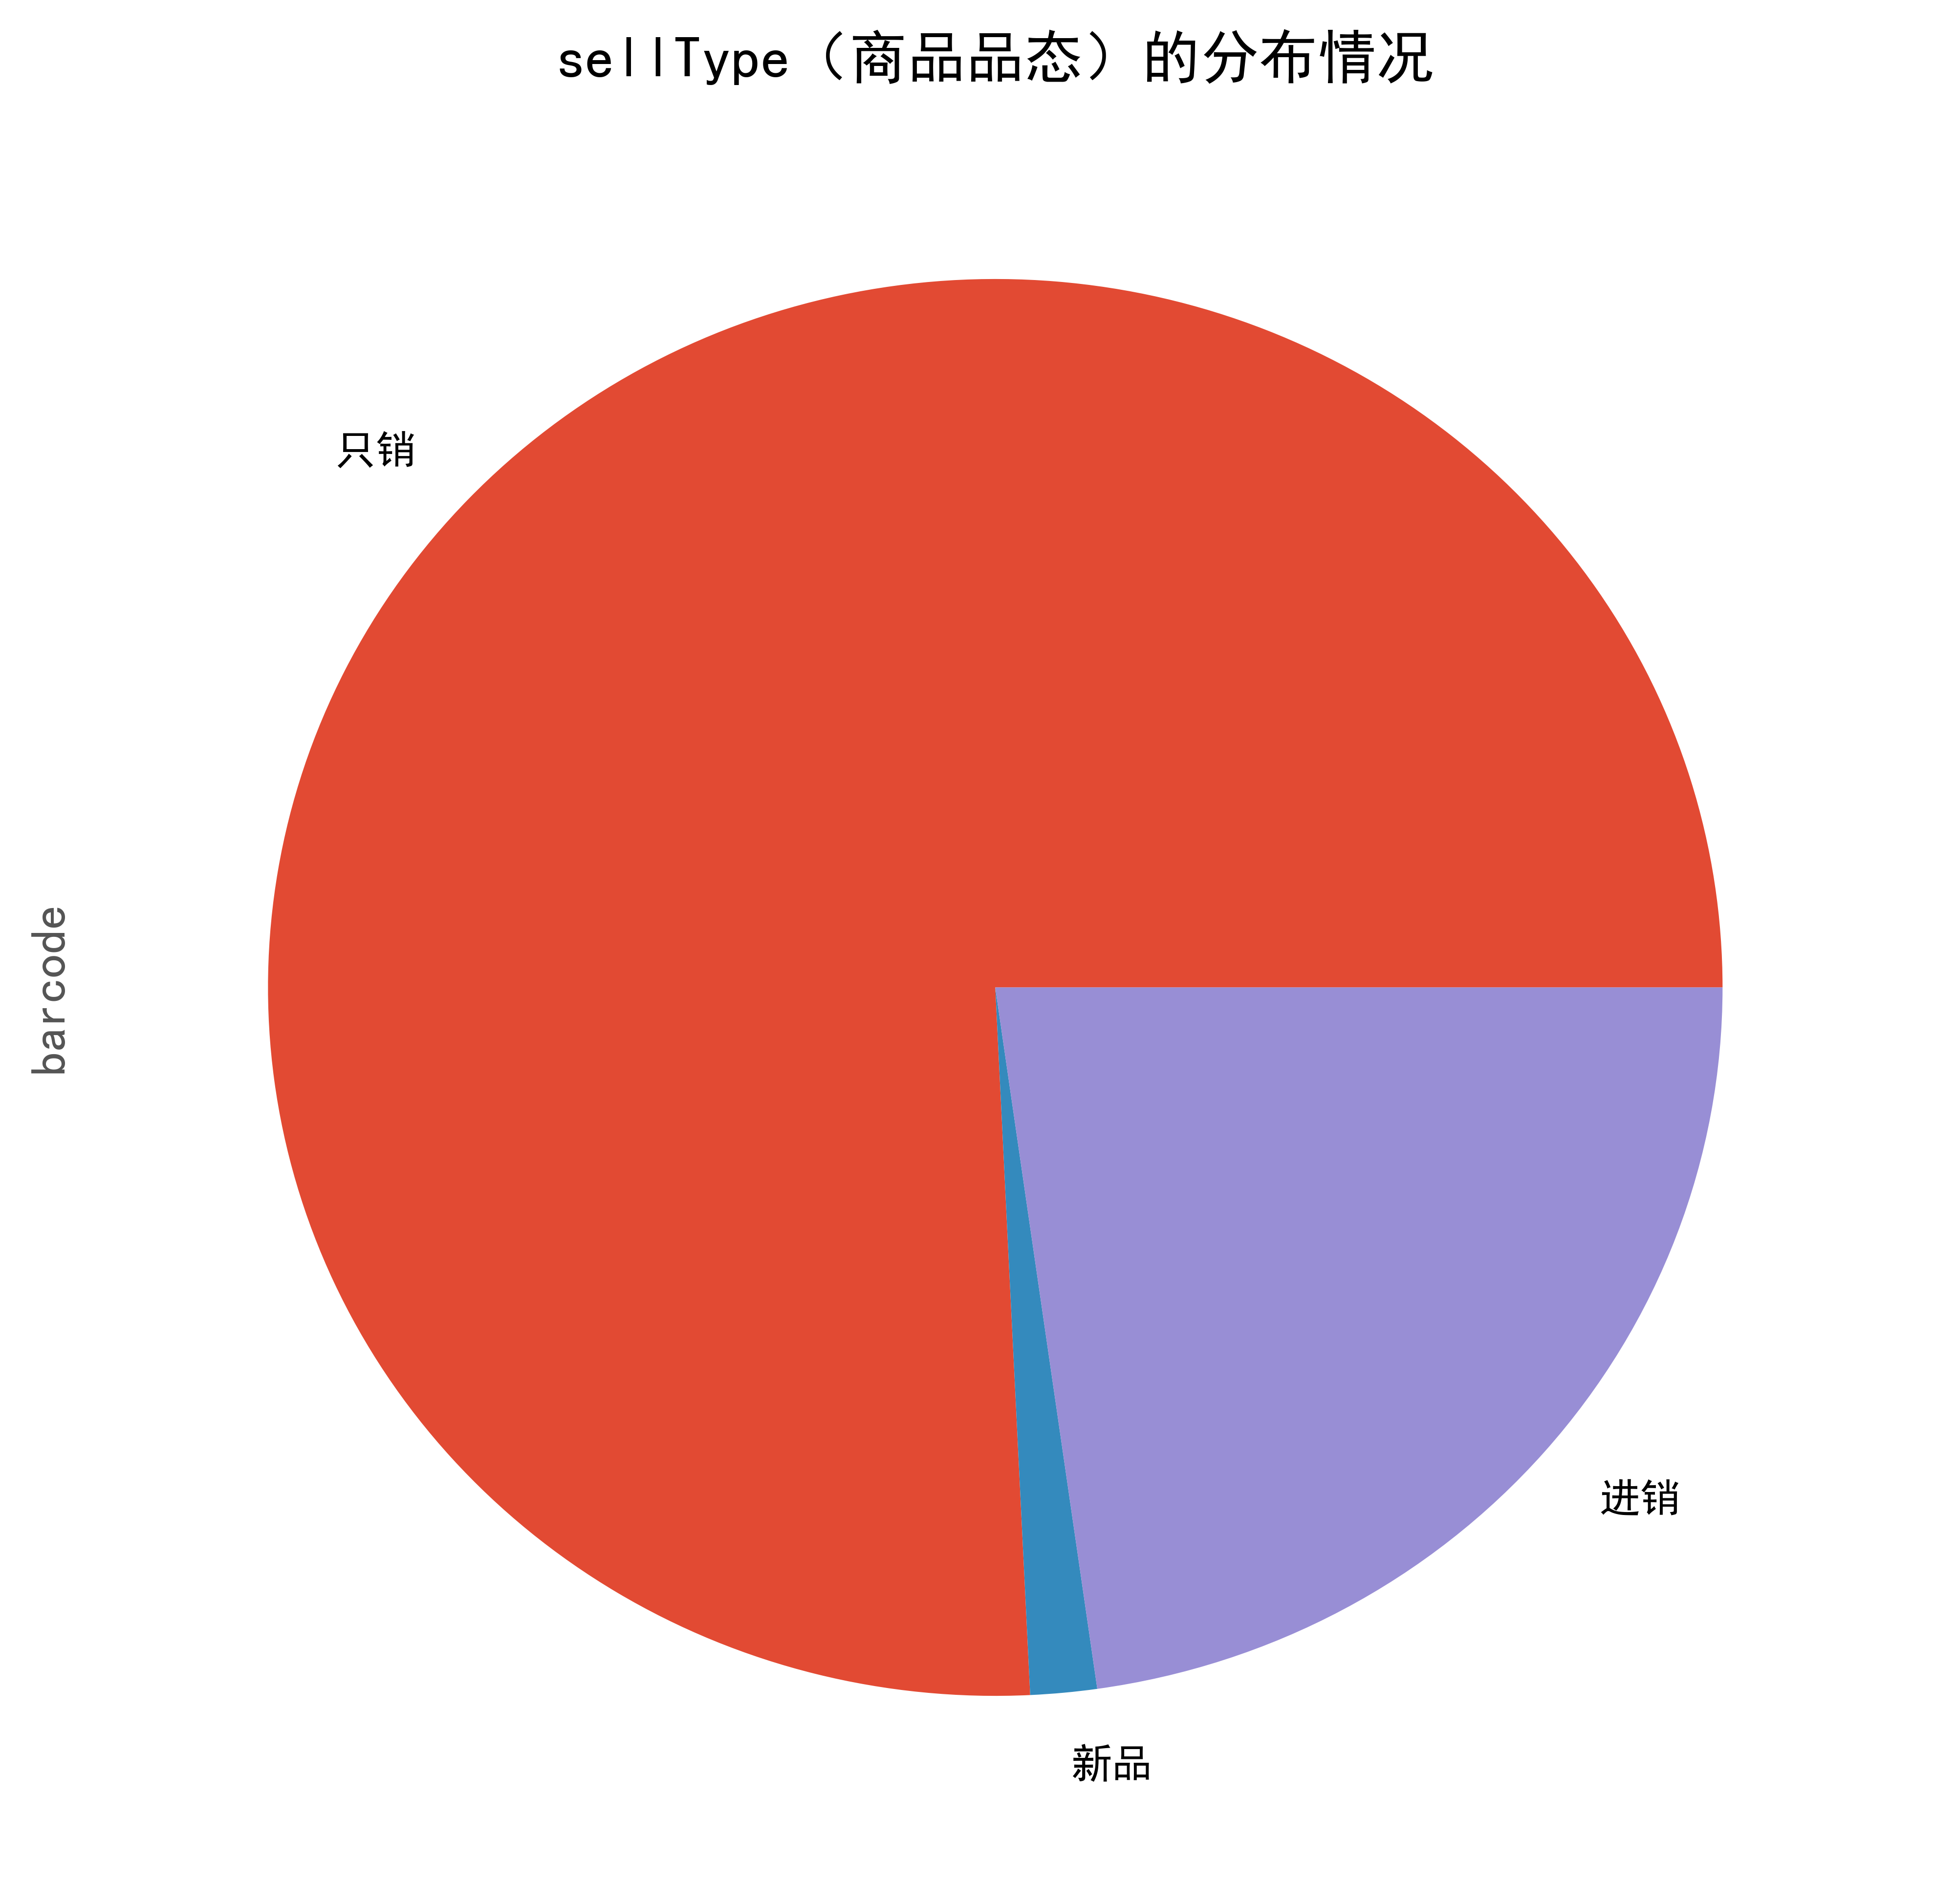

In [30]:
plt.figure()
plt.title("sellType（商品品态）的分布情况")
df_noDup.groupby('sellType')['barcode'].count().plot.pie(figsize=(8,8))
plt.show()

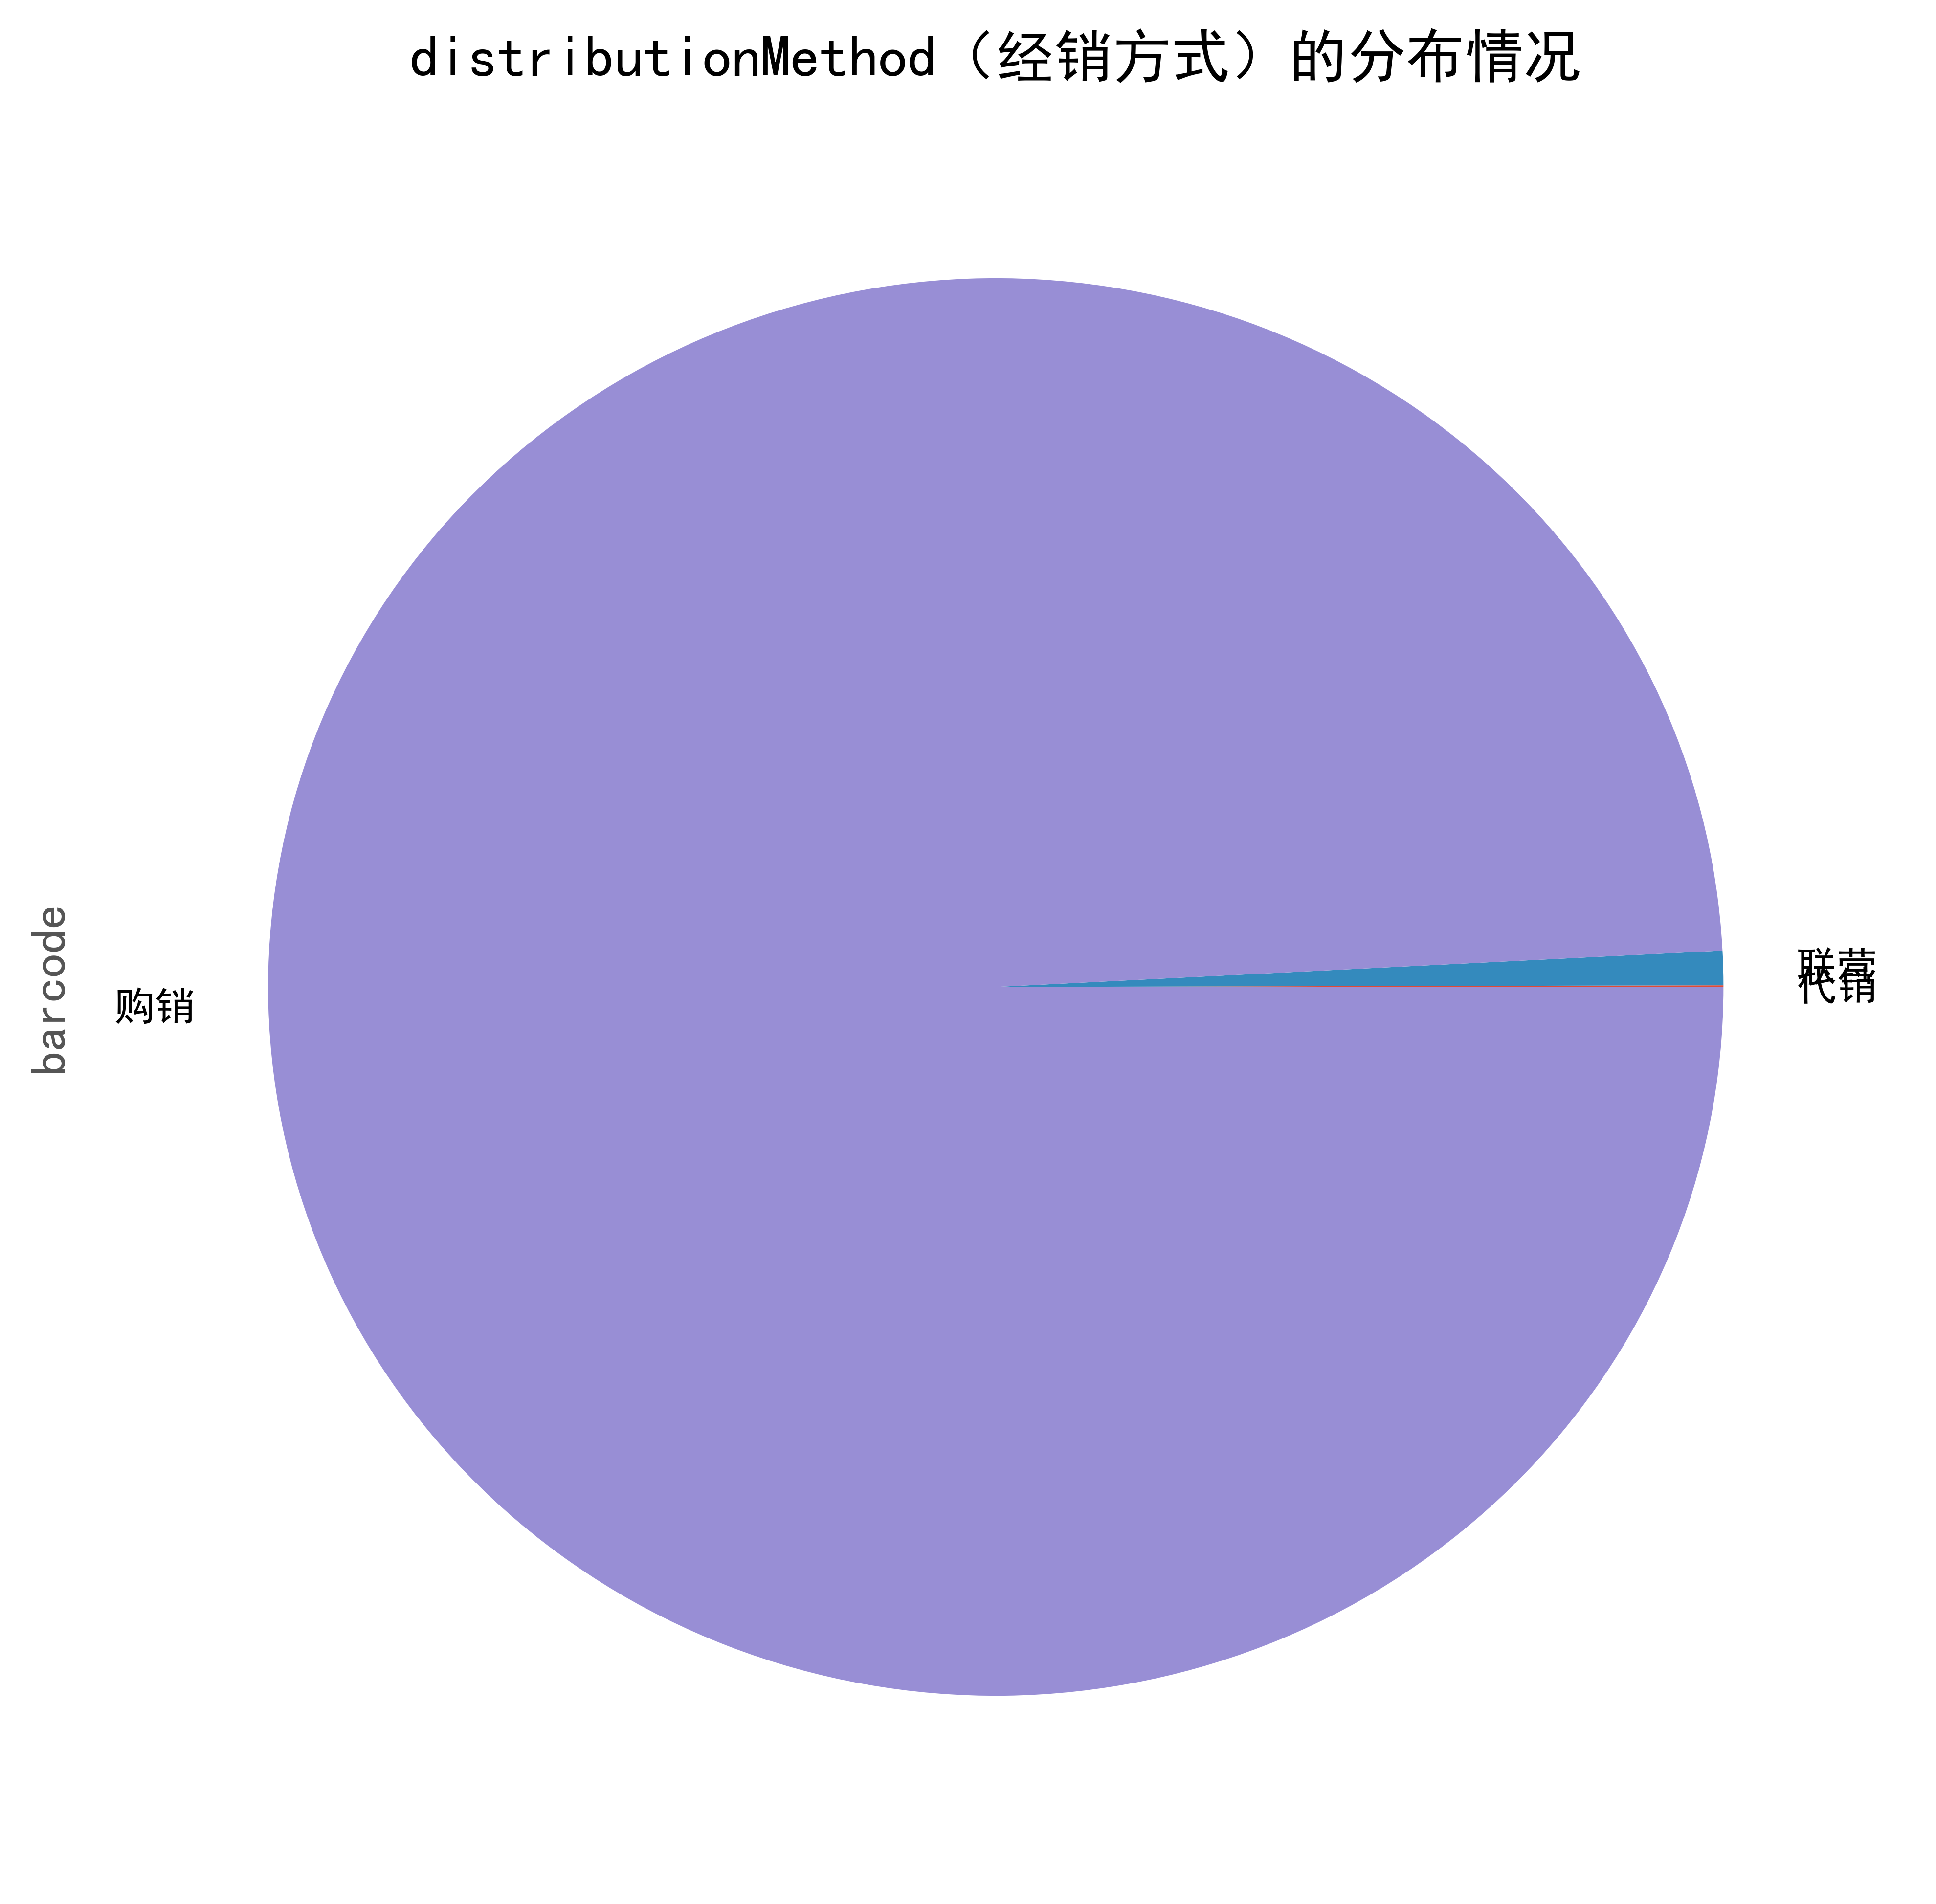

In [31]:
plt.figure()
plt.title("distributionMethod（经销方式）的分布情况")
df_noDup.groupby('distributionMethod')['barcode'].count().plot.pie(figsize=(8,8))
plt.show()